<a href="https://colab.research.google.com/github/Dennieeeee/Avocado-Price-Forecasting/blob/master/Data_Cleaning_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/Avocado-Price-Forecasting/master/avocado.csv')

In [3]:
df.head(1)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day_of_month'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
 14  month         18249 non-null  int64         
 15  day_of_month  18249 non-null  int64 

# Data Cleaning and Outliers

In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region', 'month', 'day_of_month', 'weekday'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day_of_month,weekday
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.0
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612,6.0
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281,0.0
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000,6.0
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000,6.0
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000,6.0
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000,6.0
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000,6.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Total Volume')

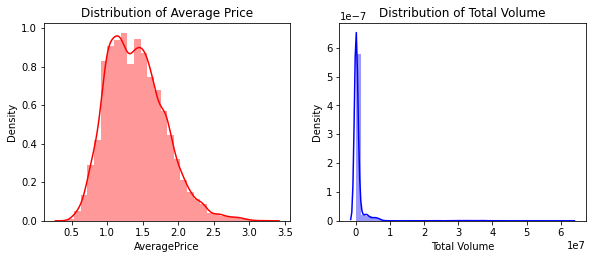

In [10]:
f= plt.figure(figsize=(15,8))

ax=f.add_subplot(231)
sns.distplot(df['AveragePrice'],bins=30,color='r',ax=ax)
ax.set_title('Distribution of Average Price')

ax=f.add_subplot(232)
sns.distplot((df['Total Volume']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of Total Volume')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Distribution of 4046')

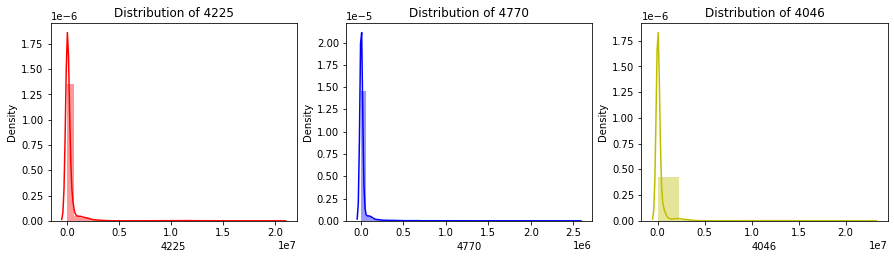

In [11]:
f= plt.figure(figsize=(15,8))

ax=f.add_subplot(231)
sns.distplot(df['4225'],bins=30,color='r',ax=ax)
ax.set_title('Distribution of 4225')

ax=f.add_subplot(232)
sns.distplot((df['4770']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of 4770')

ax=f.add_subplot(233)
sns.distplot(df['4046'],bins=10,color='y',ax=ax)
ax.set_title('Distribution of 4046')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Distribution of XLarge Bags')

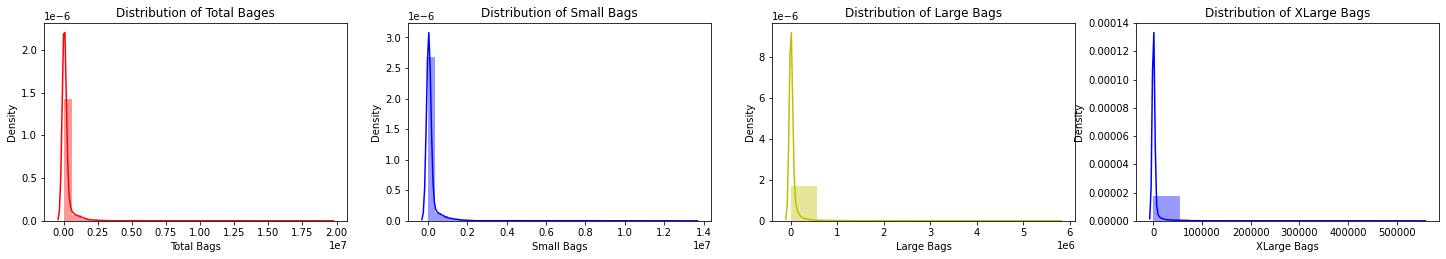

In [12]:
f= plt.figure(figsize=(25,8))

ax=f.add_subplot(241)
sns.distplot(df['Total Bags'],bins=30,color='r',ax=ax)
ax.set_title('Distribution of Total Bages')

ax=f.add_subplot(242)
sns.distplot((df['Small Bags']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of Small Bags')

ax=f.add_subplot(243)
sns.distplot(df['Large Bags'],bins=10,color='y',ax=ax)
ax.set_title('Distribution of Large Bags')

ax=f.add_subplot(244)
sns.distplot(df['XLarge Bags'],bins=10,color='b',ax=ax)
ax.set_title('Distribution of XLarge Bags')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Distribution of XLarge Bags')

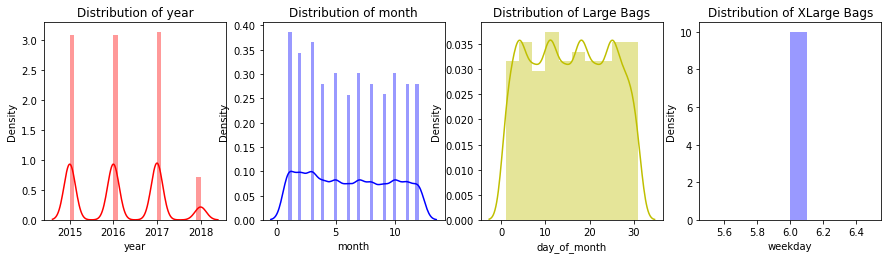

In [13]:
f= plt.figure(figsize=(15,8))

ax=f.add_subplot(241)
sns.distplot(df['year'],bins=30,color='r',ax=ax)
ax.set_title('Distribution of year')

ax=f.add_subplot(242)
sns.distplot((df['month']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of month')

ax=f.add_subplot(243)
sns.distplot(df['day_of_month'],bins=10,color='y',ax=ax)
ax.set_title('Distribution of Large Bags')

ax=f.add_subplot(244)
sns.distplot(df['weekday'],bins=10,color='b',ax=ax)
ax.set_title('Distribution of XLarge Bags')

Variables: 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' are right skewed. That means there are outliers. There are several ways to trim outliers: 

       1. Remove data above the starting percentile and below the ending percentile
       2. calculate minimum and maximum - 1.5 * IQR and find points outside the range
       3. Conduct univariate and multivariate tests

Z-score method

In [14]:
out=[]
def Zscore_outlier(df):
    for i in df: 
        z = (i-np.mean(df))/np.std(df)
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['Total Volume'])

Outliers: [27297983.67, 25083647.17, 28041335.38, 28800396.57, 22617999.38, 25114228.11, 28597756.27, 28485715.97, 31047484.27, 26240072.11, 29375123.6, 29216198.15, 28243505.52, 27753508.14, 29569086.56, 31245835.65, 33526480.08, 29761638.48, 29699845.61, 31936856.18, 33254911.87, 30358467.88, 30652211.08, 32324647.66, 31660031.68, 37943670.34, 32408705.7, 35734613.9, 37026085.75, 36549995.66, 33720159.09, 35344183.15, 32027686.15, 36400886.58, 41291704.39, 30894157.8, 33091256.26, 32046401.64, 31500669.44, 29982648.43, 32513550.51, 29572225.71, 30094698.85, 32994014.16, 29936729.76, 28012520.93, 32137333.01, 44655461.51, 28470310.84, 29043458.85, 29063542.75, 31324277.73, 30287853.7, 29583882.61, 30093540.7, 31621221.9, 22923062.65, 24989702.75, 24075126.49, 22534698.38, 21009730.21, 24753513.95, 27707046.82, 28857581.98, 29615008.49, 30305112.89, 31346091.46, 34126730.95, 37130688.91, 33993931.31, 33592097.72, 34386177.3, 33819909.09, 31201590.22, 32339377.09, 32656123.63, 35567568.

**Let's try the first way: Trim Outliers**

In [15]:
starting_percentile = df['AveragePrice'].quantile(.05)
ending_percentile = df['AveragePrice'].quantile(.95)
price_outliers_df = df.loc[((df['AveragePrice'] <= starting_percentile) | (df['AveragePrice'] >= ending_percentile))]
df_clean = df.loc[((df['AveragePrice'] > starting_percentile) & (df['AveragePrice'] < ending_percentile))]

In [16]:
print('This is what we have right now.')
print(f'The original data has {df.shape[0]} rows and {df.shape[1]} columns.')
print(f'The current clean version of data has {df_clean.shape[0]} rows and {df_clean.shape[1]} columns.')

This is what we have right now.
The original data has 18249 rows and 16 columns.
The current clean version of data has 16339 rows and 16 columns.


<strong>Let's try the second way: conducting the univariate and multivariate test</strong>

univariate

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


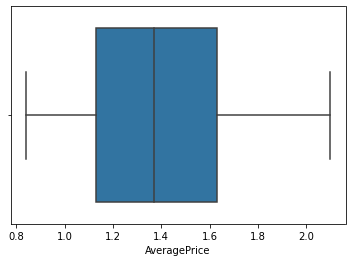

In [17]:
sns.boxplot(df_clean['AveragePrice'])

In [18]:
df_clean.head(1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day_of_month,weekday
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,6


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


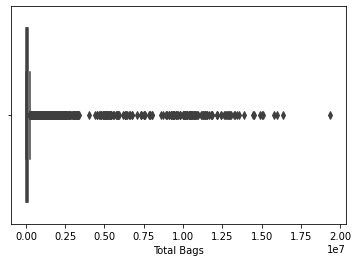

In [19]:
sns.boxplot(df_clean['Total Bags'])

In [20]:
df_clean['Total Bags'].max()

19373134.37

In [21]:
# we want to exclude this record
df_clean[df_clean['Total Bags'] >= 19373134.37]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day_of_month,weekday
9097,2018-02-04,0.87,62505646.52,21620180.9,20445501.03,1066830.22,19373134.37,13384586.8,5719096.61,269450.96,conventional,2018,TotalUS,2,4,6


In [22]:
df_clean = df_clean[df_clean['Total Bags'] < 19373134.37]

Multivariate

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


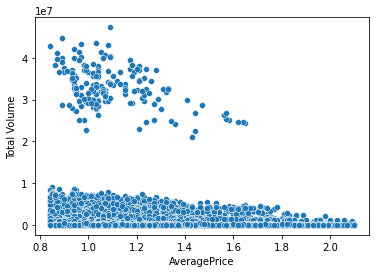

In [23]:
sns.scatterplot('AveragePrice', 'Total Volume', data=df_clean)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

Text(0.5, 1.0, 'Average vs. XLarge Bags')

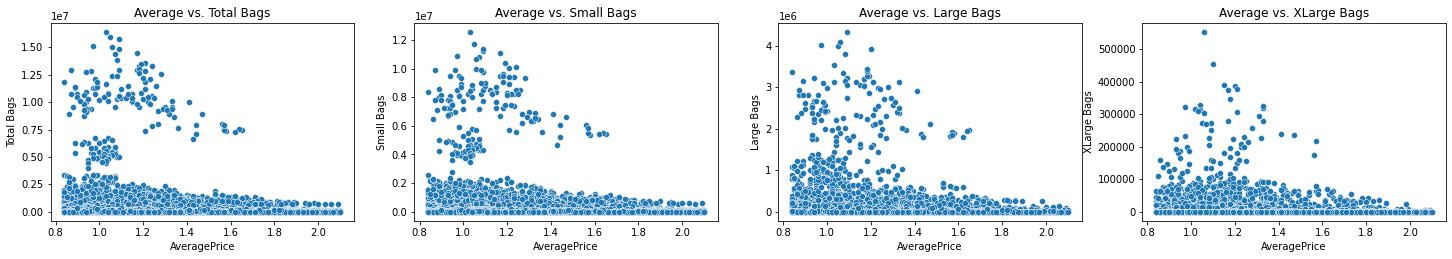

In [24]:

f= plt.figure(figsize=(25,8))

ax=f.add_subplot(241)
sns.scatterplot('AveragePrice', 'Total Bags', data=df_clean)
ax.set_title('Average vs. Total Bags')

ax=f.add_subplot(242)
sns.scatterplot('AveragePrice', 'Small Bags', data=df_clean)
ax.set_title('Average vs. Small Bags')

ax=f.add_subplot(243)
sns.scatterplot('AveragePrice', 'Large Bags', data=df_clean)
ax.set_title('Average vs. Large Bags')

ax=f.add_subplot(244)
sns.scatterplot('AveragePrice', 'XLarge Bags', data=df_clean)
ax.set_title('Average vs. XLarge Bags')


# EDA

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Different Types of Avocado')

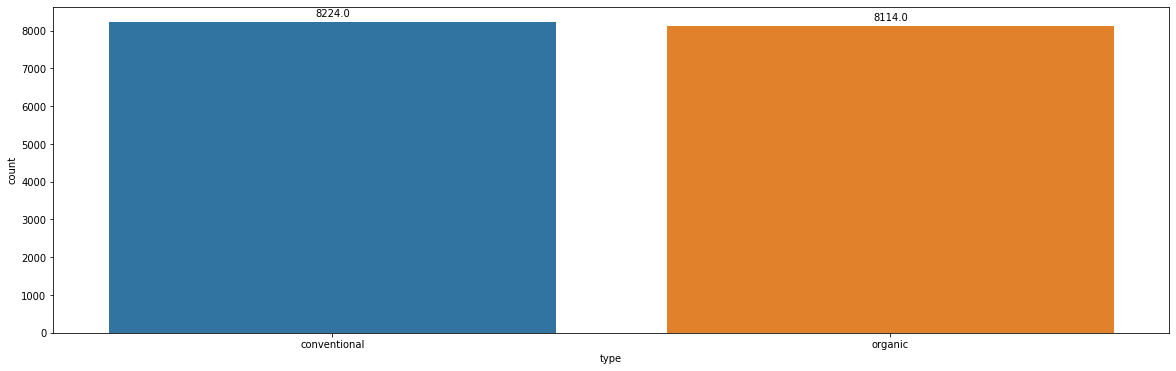

In [25]:
ax=f.add_subplot(121)
plt.figure(figsize=(20,6))
splot = sns.countplot(df_clean['type'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set_title('Different Types of Avocado')

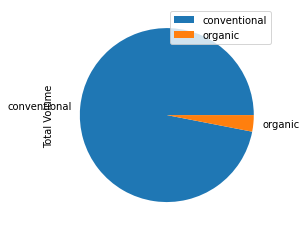

In [26]:
df_clean.groupby(['type']).sum().plot(kind='pie', y='Total Volume')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


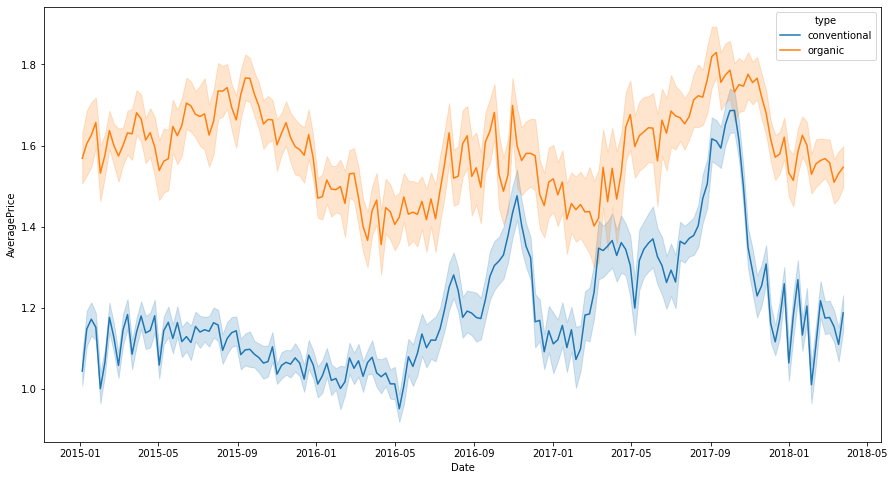

In [27]:
plt.figure(figsize=(15,8))
sns.lineplot('Date','AveragePrice', data=df_clean, hue='type')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


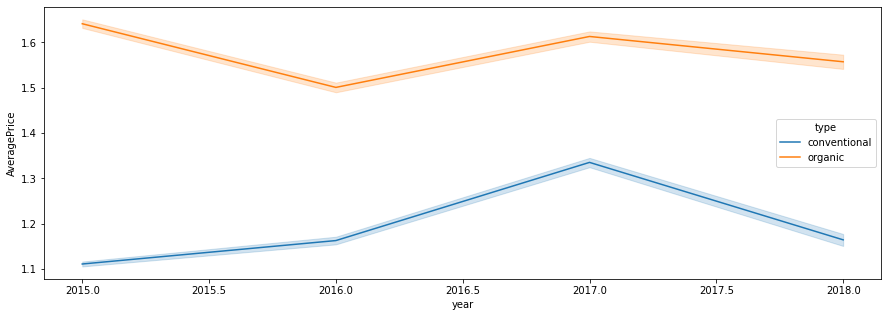

In [28]:
plt.figure(figsize=(15,5))
sns.lineplot('year','AveragePrice', data=df_clean, hue='type')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


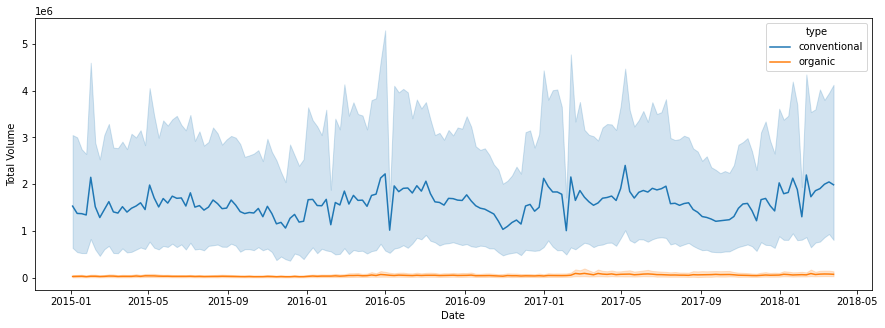

In [29]:
plt.figure(figsize=(15,5))
sns.lineplot('Date', 'Total Volume', data=df_clean, hue='type')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


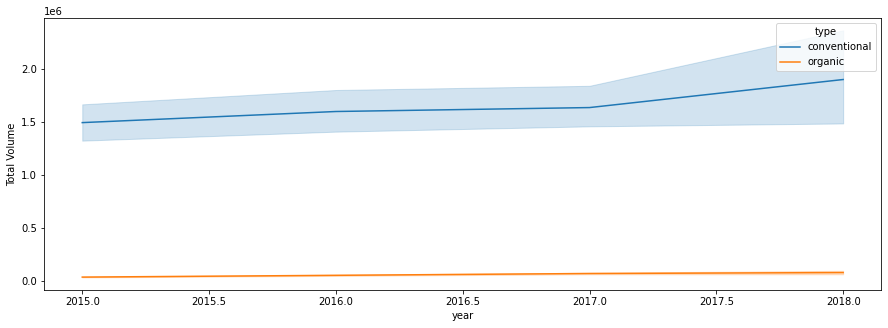

In [30]:
plt.figure(figsize=(15,5))
sns.lineplot('year', 'Total Volume', data=df_clean, hue='type')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


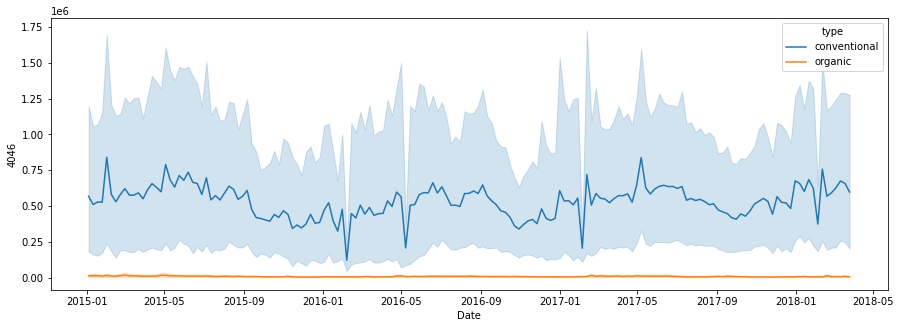

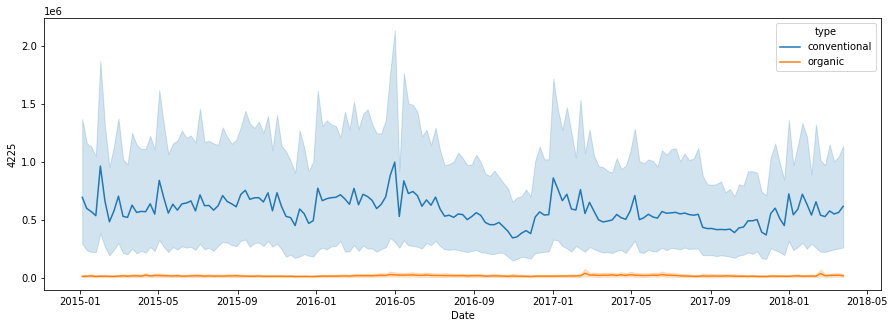

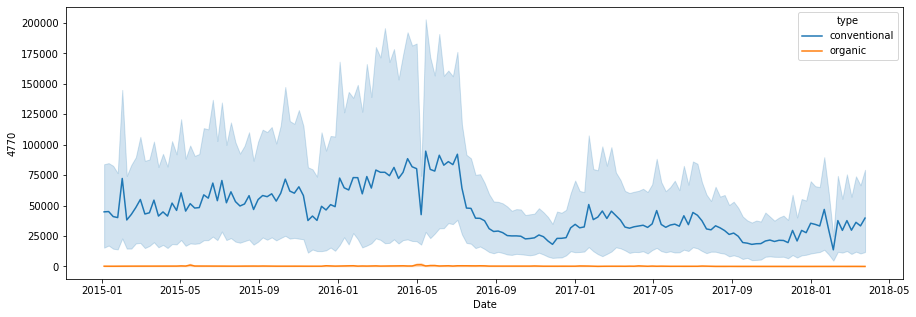

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot('Date','4046', data=df_clean, hue='type')

plt.figure(figsize=(15,5))
sns.lineplot('Date','4225', data=df_clean, hue='type')

plt.figure(figsize=(15,5))
sns.lineplot('Date','4770', data=df_clean, hue='type')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

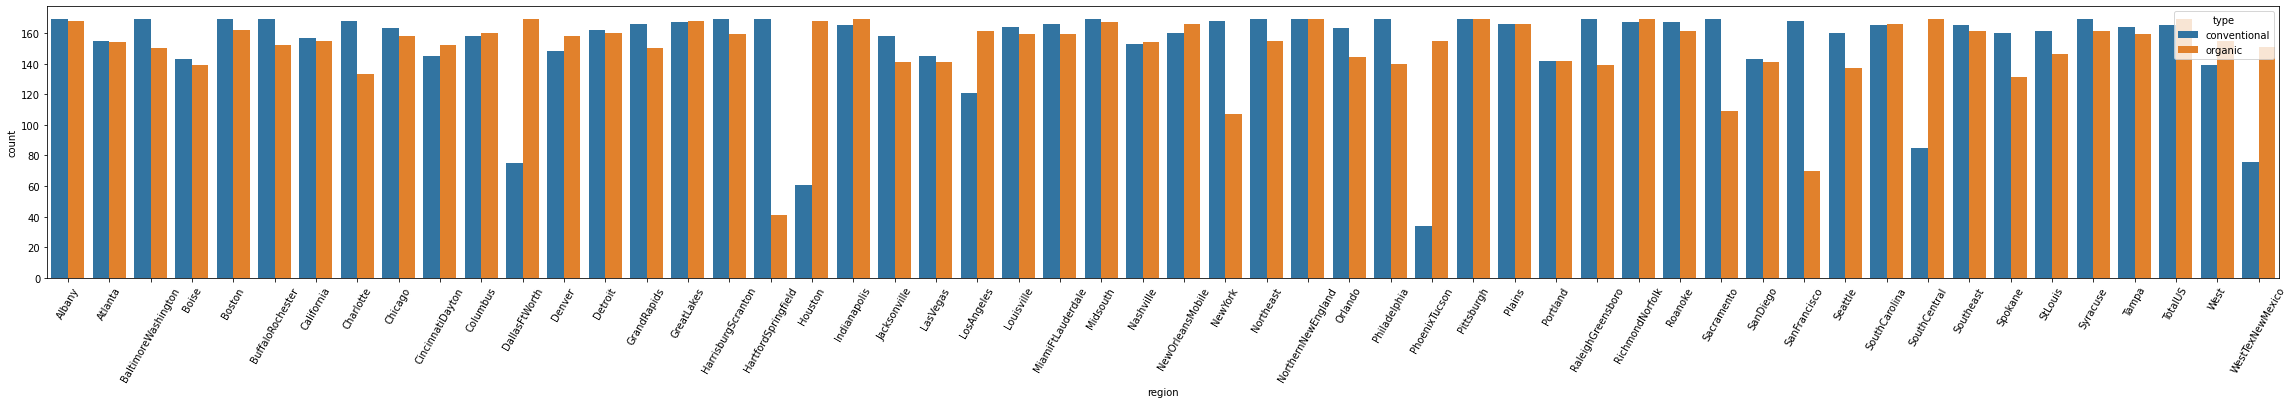

In [32]:
plt.figure(figsize=(40,5))
sns.countplot('region', data=df_clean, hue='type')
plt.xticks(rotation=60)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

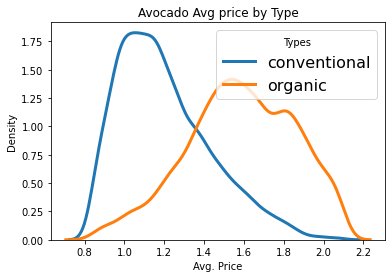

In [34]:
# List of types
types = ['conventional', 'organic']

# Iterate through the five airlines
for i in types:
    # Subset to the airline
    subset = df_clean[df_clean['type'] == i]
    
    # Draw the density plot
    sns.distplot(subset['AveragePrice'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Types')
plt.title('Avocado Avg price by Type')
plt.xlabel('Avg. Price')
plt.ylabel('Density')

In [33]:
df_clean.head(1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day_of_month,weekday
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,6
